In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random())
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                         10.4.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
brotli                      1.1.0
certifi                     2024.07.04
cffi                        1.16.0
charset_normalizer          3.3.2
cloudpickle                 3.0.0
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dask                        2024.7.0
dateutil                    2.9.0
debugpy                     1.8.2
decorator                   5.1.1
defusedxml                  0.7.1
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.8
ipykernel        

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")

/tmp/ipykernel_2602970/2786226622.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_color = cm.get_cmap(initial_cmap, 128)
/tmp/ipykernel_2602970/2786226622.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_grey = cm.get_cmap("Greys", 128)


In [ ]:
adata_epcam=sc.read_h5ad('adata_epcam_cluster_annotation.h5ad')

In [ ]:
adata_all=sc.read_h5ad('all_annotation.h5ad')

In [ ]:
adata_all

AnnData object with n_obs × n_vars = 55004 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'annotation', 'cluster_annotations', 'cluster_annotations1', 'leiden_refined', 'cluster_annotations_refined'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotation_colors', 'cluster_annotations1_colors', 'cluster_annotations_colors', 'cluster_annotations_refined_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_refined_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_epcam

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

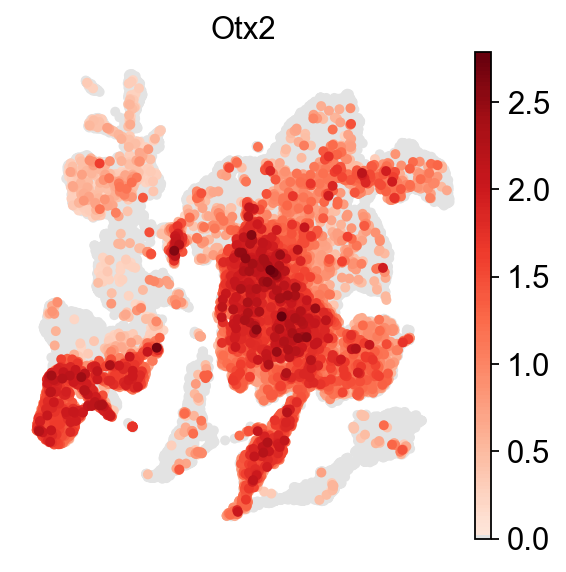

In [ ]:
sc.pl.umap(adata_all, color = ["Otx2"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data',# save='Otx2.svg'
          )

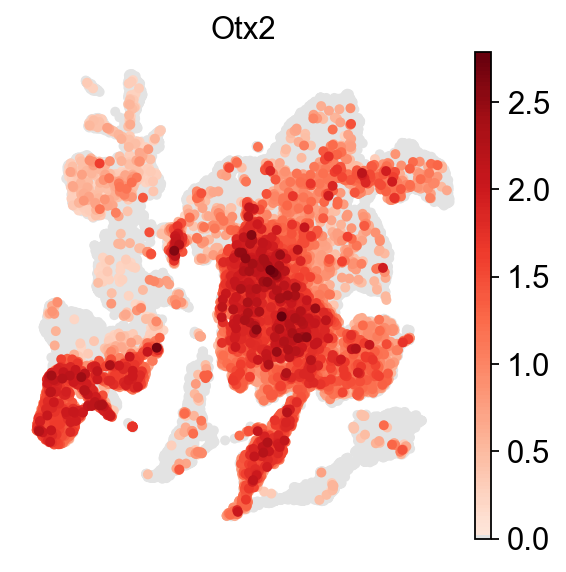

In [ ]:
sc.pl.umap(adata_all, color = ["Otx2"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data', save='Otx2.svg'
          )

In [ ]:
# Add Olfactory 'find' cluster in main embedding

In [ ]:
# Subset olfactory cells
olfactory_cells = adata_epcam[adata_epcam.obs['cluster_annotations'] == 'Olfactory'].copy()
olfactory_cells

AnnData object with n_obs × n_vars = 591 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
olfactory_cells_names = adata_epcam[adata_epcam.obs['cluster_annotations'] == 'Olfactory'].obs_names
olfactory_cells_names

Index(['AAAGGGCGTACGTAGG-1', 'AACCTTTTCGTCTCAC-1', 'AACGGGACATAGCTGT-1',
       'AAGACTCGTAACACCT-1', 'AAGCGTTCAATACGAA-1', 'AATGAAGCATCGGATT-1',
       'AATGACCCATAATGAG-1', 'ACAACCAGTAGGAGGG-1', 'ACACTGAAGCTCCGAC-1',
       'ACAGGGAGTGTGGTCC-1',
       ...
       'TGCAGGCAGTGCGCTC-1-3', 'TGCTCCAAGACAAGCC-1-3', 'TGTCAGAGTATCGTTG-1-3',
       'TGTTCATAGCCGCTTG-1-3', 'TGTTCCGGTCCCTCAT-1-3', 'TTCTAACTCAGAGCGA-1-3',
       'TTGCTGCTCATTGGTG-1-3', 'TTGGGATCACCACTGG-1-3', 'TTGGGATTCCAGTACA-1-3',
       'TTTACGTCAGTCCGTG-1-3'],
      dtype='object', length=591)

In [ ]:
# Filter barcodes that are in both objects
valid_olfactory = olfactory_cells_names[olfactory_cells_names.isin(adata_all.obs_names)]

# Now, find the clusters (e.g., leiden) of these olfactory cells in the full object
olfactory_clusters = adata_all.obs.loc[valid_olfactory, 'leiden']

# Count how many olfactory cells are in each cluster
olfactory_clusters.value_counts()


leiden
28    557
23     27
9       4
20      1
5       1
21      1
29      0
22      0
24      0
25      0
26      0
27      0
0       0
30      0
32      0
33      0
34      0
35      0
36      0
37      0
31      0
19      0
1       0
10      0
2       0
3       0
4       0
6       0
7       0
8       0
11      0
18      0
12      0
13      0
14      0
15      0
16      0
17      0
38      0
Name: count, dtype: int64

In [ ]:
main_forebrain=["Sox2","Otx2","Six3","Pax6","Foxg1","Fezf1", "leiden", "Epcam","Fezf2"]

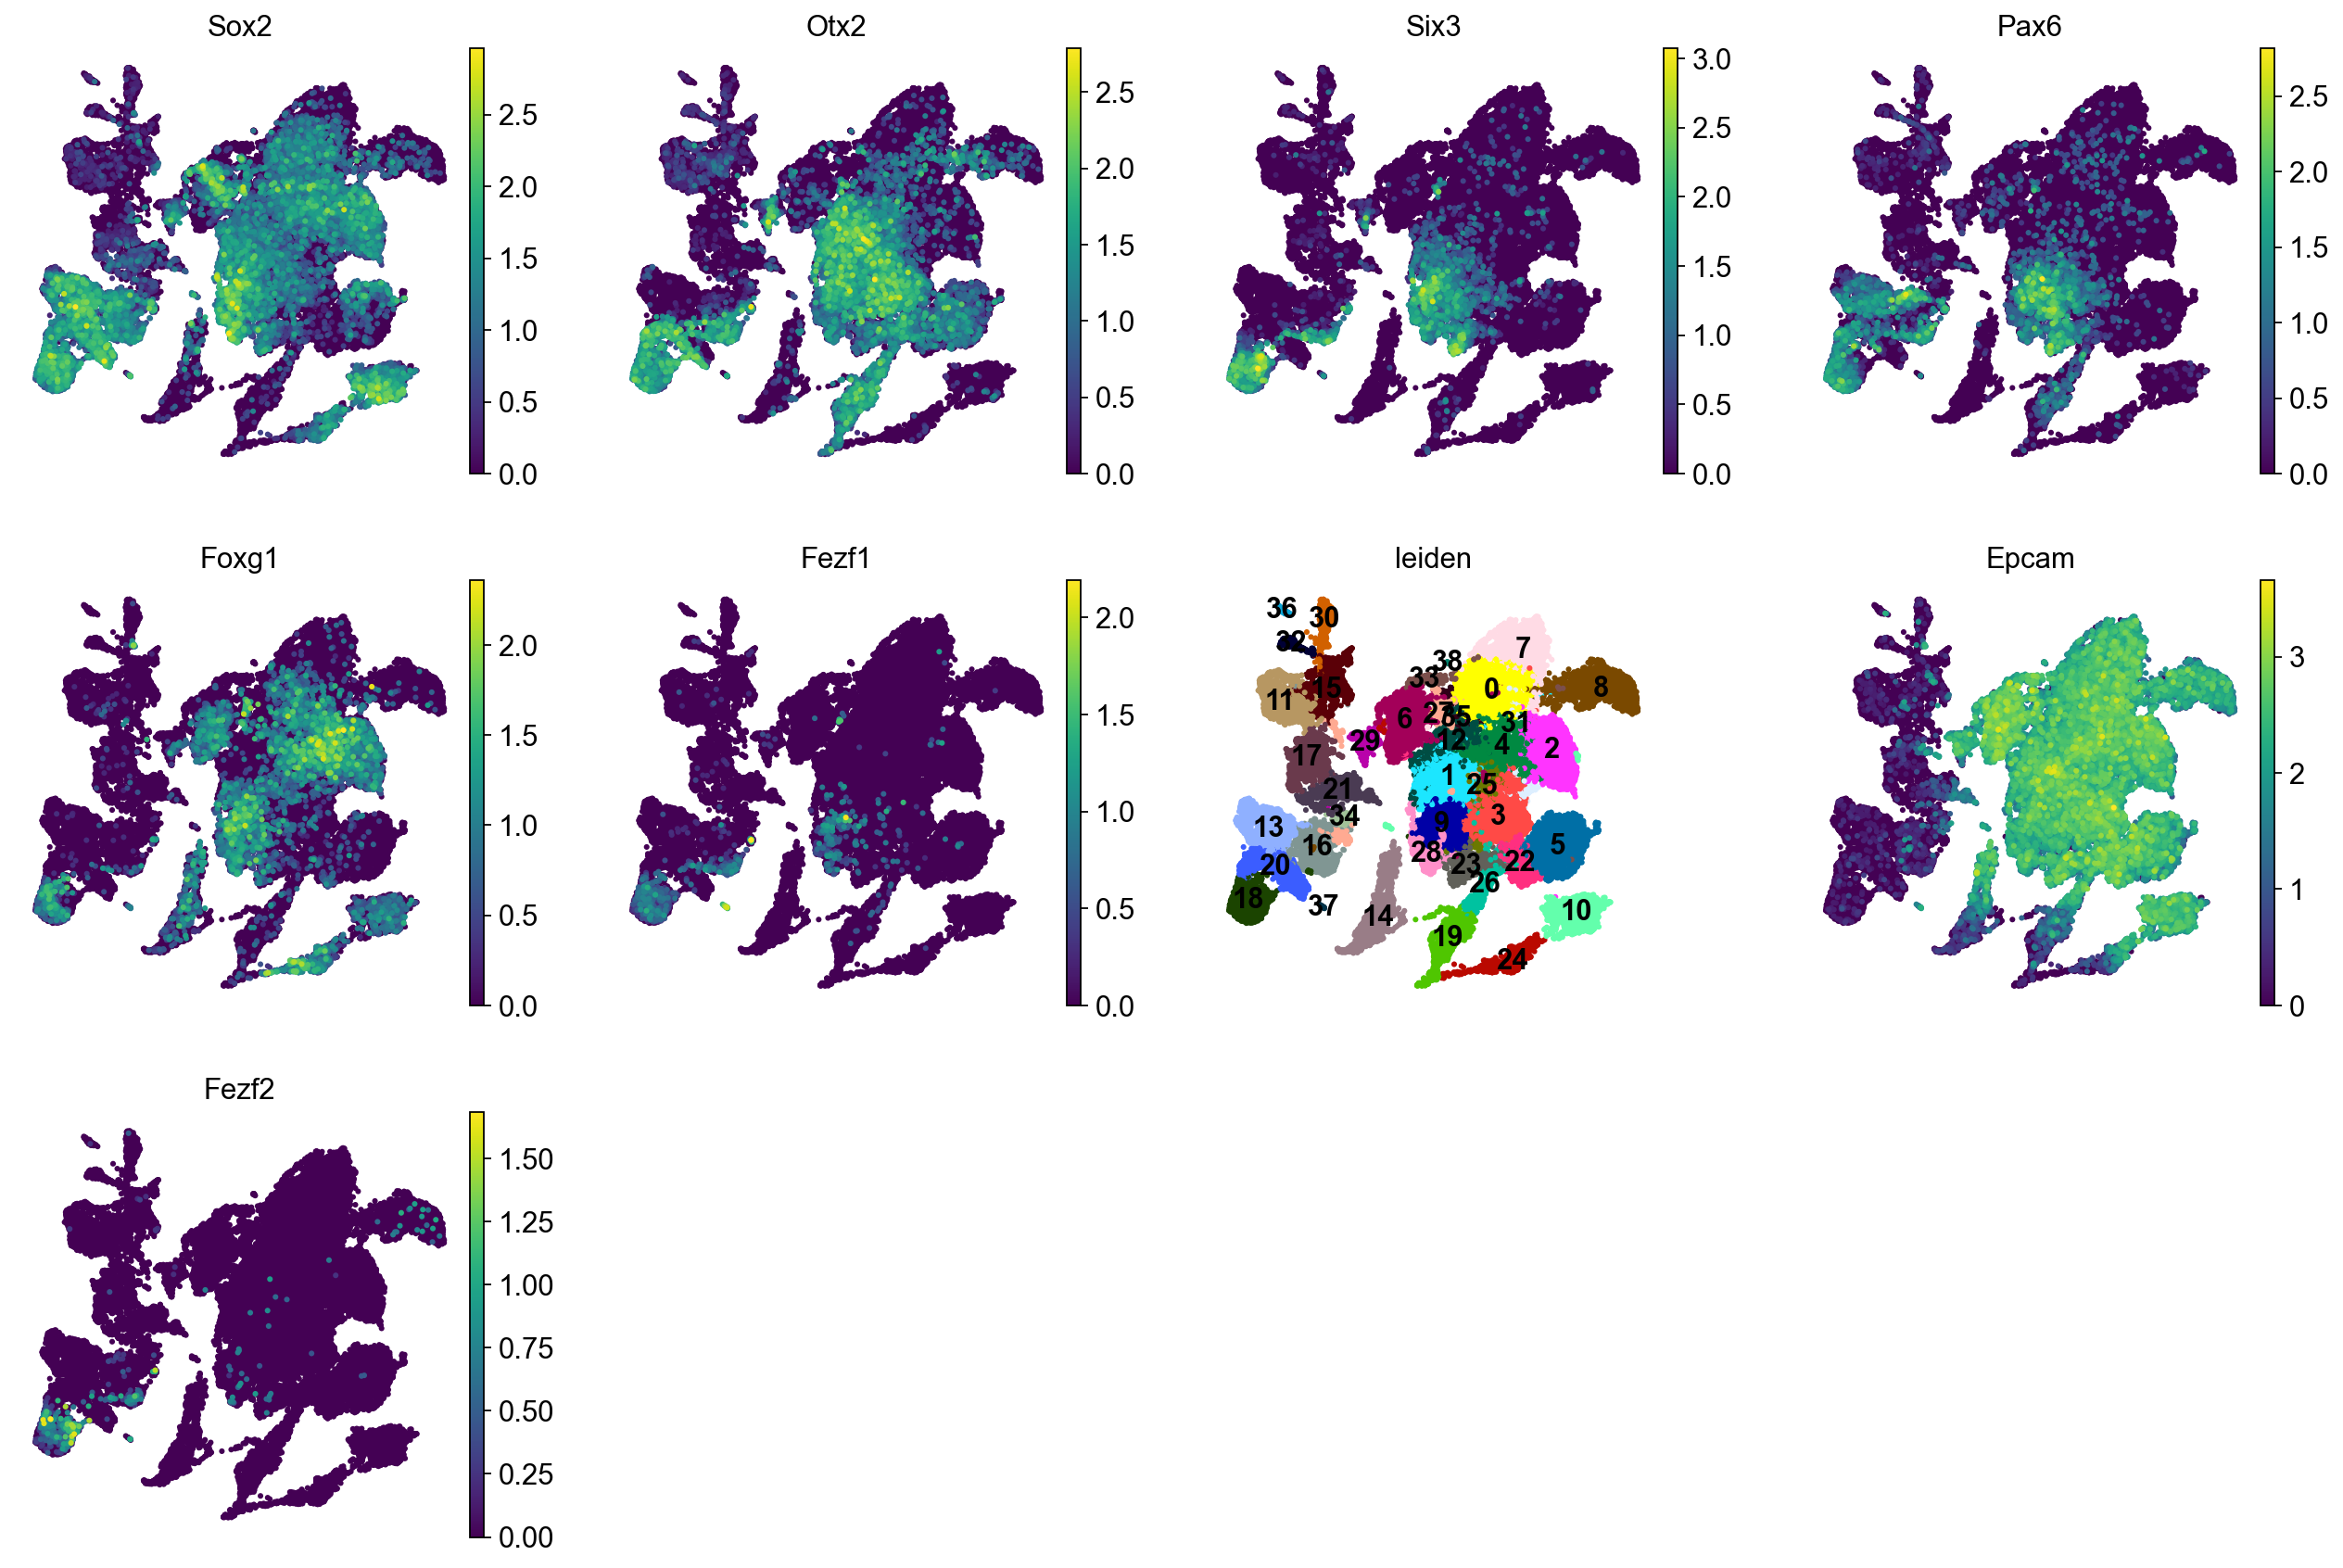

In [ ]:
sc.pl.umap(adata_all, color=main_forebrain,  size=30, frameon=False, legend_loc='on data')

In [ ]:
# Define masks for clusters
cl18_mask1 = adata_all.obs['leiden'] == '18'
cl28_mask1 = adata_all.obs['leiden'] == '28'

# Define "rest" as all other cells
rest_mask_18 = ~cl18_mask1  # everything except cluster 18
rest_mask_28 = ~cl28_mask1  # everything except cluster 28

In [ ]:
# Helper function to get expressed genes in given cell group
def get_expressed_genes(adata_subset, min_frac):
    expr = np.array((adata_subset.X > 0).mean(axis=0)).flatten()
    return adata_subset.var_names[expr >= min_frac].tolist()

# Subsets
adata_cl18 = adata_all[cl18_mask1]
adata_cl28 = adata_all[cl28_mask1]
adata_rest = adata_all[rest_mask_18 & rest_mask_28]  # everything except cl18 and cl28

# Get expressed genes
genes_cl18 = get_expressed_genes(adata_cl18, 0.08)
genes_cl28 = get_expressed_genes(adata_cl28, 0.08)
genes_rest = get_expressed_genes(adata_rest, 0.05)



In [ ]:
# Step 1: Define expressed gene sets (already done earlier)
genes_cl18_set = set(genes_cl18)
genes_cl28_set = set(genes_cl28)
genes_rest_set = set(genes_rest)

# Step 2: Get unique genes
# Expressed in cluster 18 or cluster 28, but not in rest
unique_olfactory = genes_cl18_set - genes_rest_set
unique_forebrain = genes_cl28_set - genes_rest_set

In [ ]:
len(unique_olfactory)

787

In [ ]:
len(unique_forebrain)

251

In [ ]:
# Intersection of olfactory and forebrain-specific genes
shared_olfactory_forebrain = unique_olfactory.intersection(unique_forebrain)

print(f"Shared genes (olfactory & forebrain, not in rest): {len(shared_olfactory_forebrain)}")


Shared genes (olfactory & forebrain, not in rest): 124


In [ ]:
gene_list =list(shared_olfactory_forebrain)


In [ ]:
gene_list1=['Pax6', 'Otx1', 'Kif27', 'Foxa2', 'Rfx2', 'Six6', 'Fezf1','Mef2b', 'Vax1', 'Lhx2','Emx2','Nr2e1', 'Fzd5', 'Dmrta1', 'Gli1','Nr3c1', 'Rfx5',
            'Hcn1', 'Gm5796', 'Iqcg', 'Afmid','Gm8281','Slc16a13','Rnf31','Tctn1','Nyap1','Dtx3l','Dmrt3','2500002B13Rik', 'Cadm2','Gm35315', 'Ppp1r26', 'Gm21814','Itprip',
            'Mpped1','Rnf208','Gm30015','Rtl1','Lpcat4','Acss2','Dnaaf3','Kcnd2','Lonrf2','Cfap47','Ppfia3','Actn2','Asphd2','Spire2','Mip','Gm26691','Endod1','Kctd11','Kcnip4','C1ql1','Entpd5',
            'Lrrc56', 'Zkscan2','Nalcn', 'Ermn', 'Dbndd2','C1qtnf4','Vax1','Mtm1', 'Cfap77','Mir670hg','Gm4675','Glb1l','Bloc1s3','Gm31793','Slc6a15','Gabra4', 'Bves', 'Gm26887','C130071C03Rik',
            'Cfap43', 'BC048403','Gm17276','Myb', 'P4htm', 'Gm26709', 'Maob', 'Clcn2', 'Rusc1', 'Hap1', 'Pcdh11x', 'Zscan25', 'Six3os1', 'Gm38037', 'Ttc9', 'Rai2', 'Them6', 'Ogfod2', 'Gm14295',
            'Dusp28', 'Khk','Dmrta2','Shtn1','Snap91','Zfp27','Pantr1','Bdh2','Ppnr','Frmd3', 'Xylb', 'Tnfsf9', 'Parp16', 'Tmem132d', 'Rnf182', 'Scn5a', 'D130020L05Rik', 'Nol4','Nr4a1','4933408B17Rik',
            'Nlgn1','Gm3739','Ralyl','D030028A08Rik', 'Gm10135', 'Gm3164', 'Dleu7', 'Depdc7', '3110039M20Rik', 'Pcsk1n', 'Gm10406','Mcf2','Gm15414','2610316D01Rik','Hesx1']

In [ ]:
# Add score to adata.obs
sc.tl.score_genes(adata_all, gene_list1, score_name='signature_score_olfactory_forebrain')

# Plot in UMAP
#sc.pl.umap(adata_all, color='signature_score_olfactory_forebrain', cmap=reds_cmap, frameon=False, size=30)

computing score 'signature_score_olfactory_forebrain'
    finished: added
    'signature_score_olfactory_forebrain', score of gene set (adata.obs).
    345 total control genes are used. (0:00:04)


In [ ]:
reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")

/tmp/ipykernel_2602970/2786226622.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_color = cm.get_cmap(initial_cmap, 128)
/tmp/ipykernel_2602970/2786226622.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_grey = cm.get_cmap("Greys", 128)


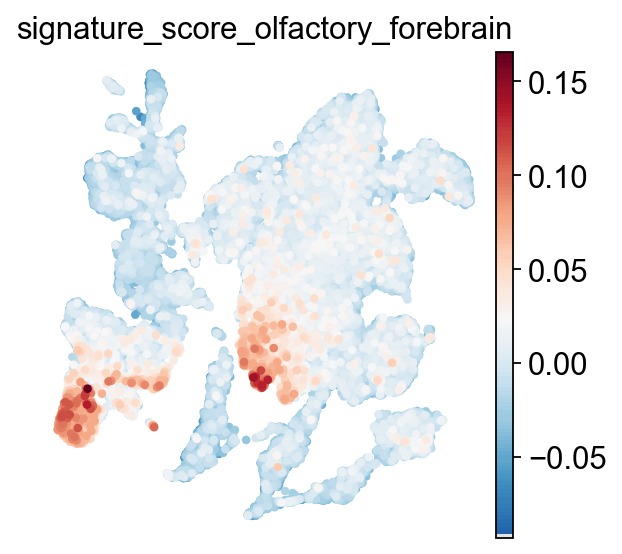

In [ ]:
# Plot in UMAP
sc.pl.umap(adata_all, color='signature_score_olfactory_forebrain', cmap=rb_cmap, frameon=False, size=60, #save='signature_red_blue_1.svg'
          )

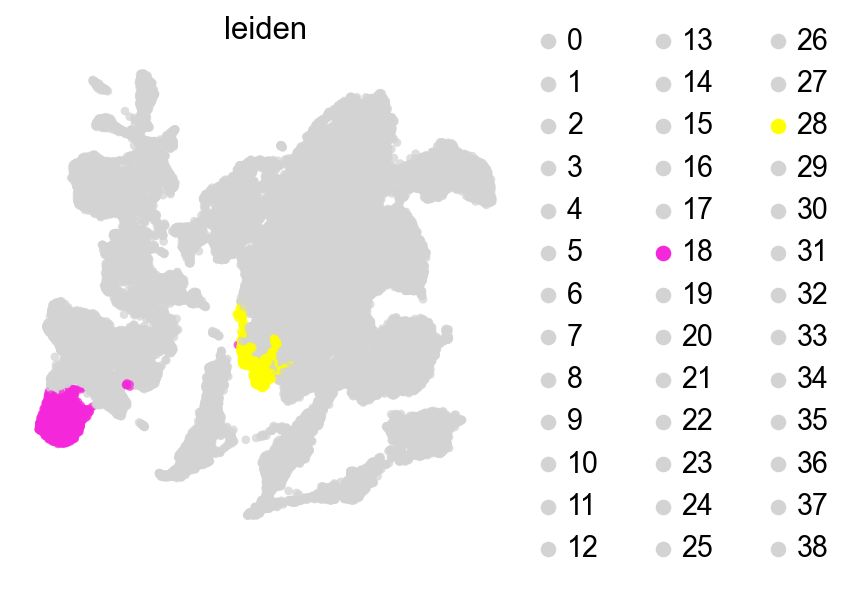

In [ ]:
# Get the correct cluster order
all_clusters = adata_all.obs['leiden'].cat.categories

# Assign specific colors to 18 and 28, grey to others
cluster_colors = [
    'yellow' if c == '28' else
    '#F527DA' if c == '18' else
    'lightgrey'
    for c in all_clusters
]

# Plot
sc.pl.umap(
    adata_all,
    color='leiden',
    palette=cluster_colors,
    frameon=False,
    alpha=0.75,
    size=60,
   # save='olfact_forebrain_colored_1.svg'  # will save to ./figures/
)


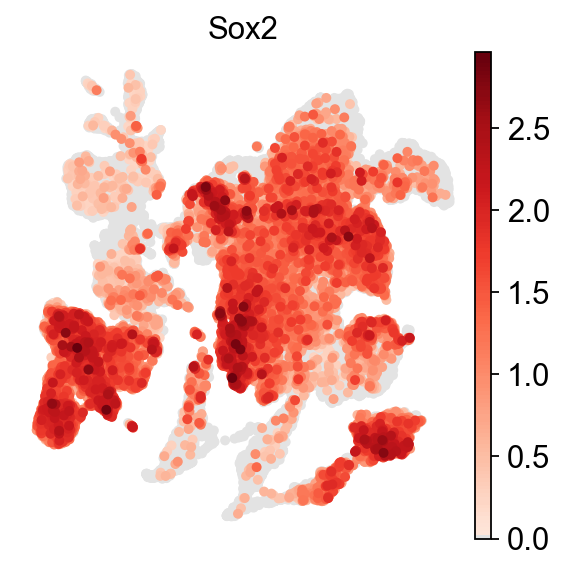

In [ ]:
sc.pl.umap(adata_all, color = ["Sox2"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data', #save='Sox2.svg'
          )

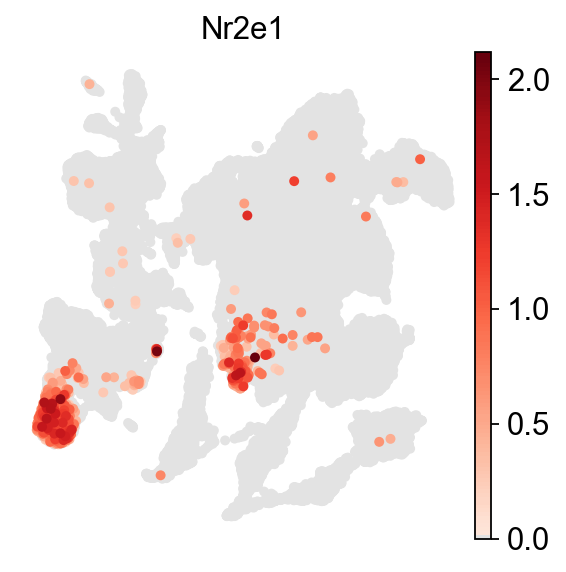

In [ ]:
sc.pl.umap(adata_all, color = ["Nr2e1"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data', #save='Nr2e1.svg'
          )

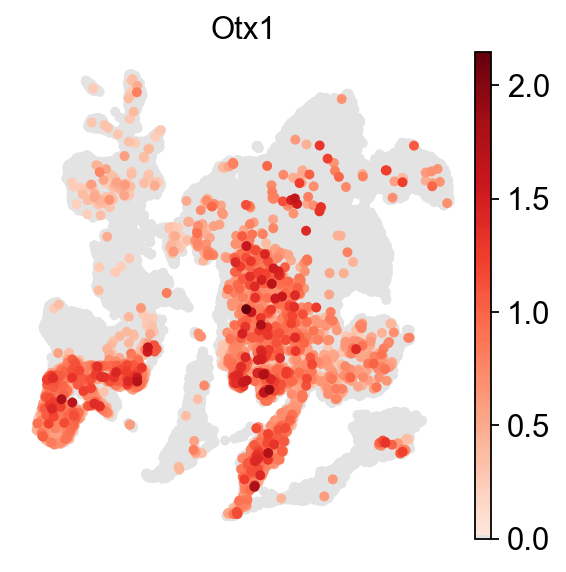

In [ ]:
sc.pl.umap(adata_all, color = ["Otx1"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data', #save='Otx1.svg'
          )

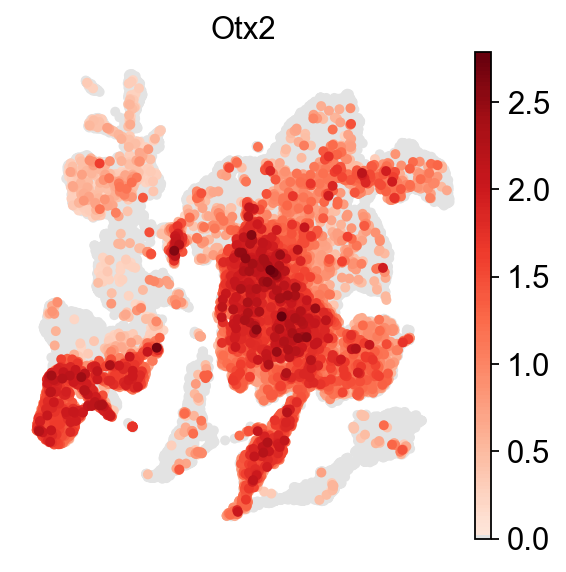

In [ ]:
sc.pl.umap(adata_all, color = ["Otx2"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data',# save='Otx2.svg'
          )

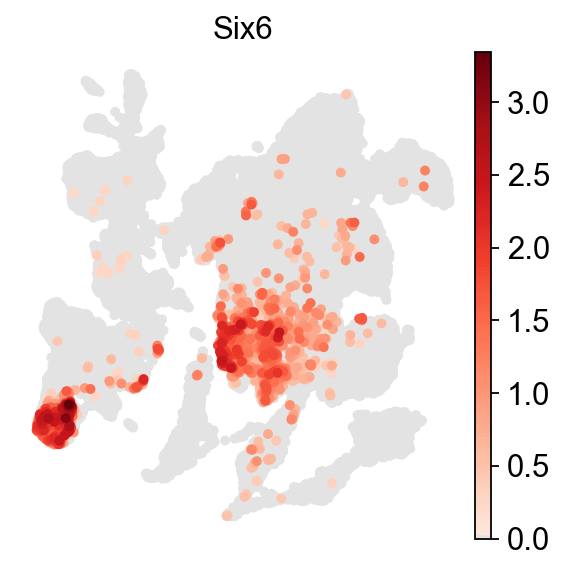

In [ ]:
sc.pl.umap(adata_all, color = ["Six6"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
           legend_loc='on data', #save='Six6.svg'
          )

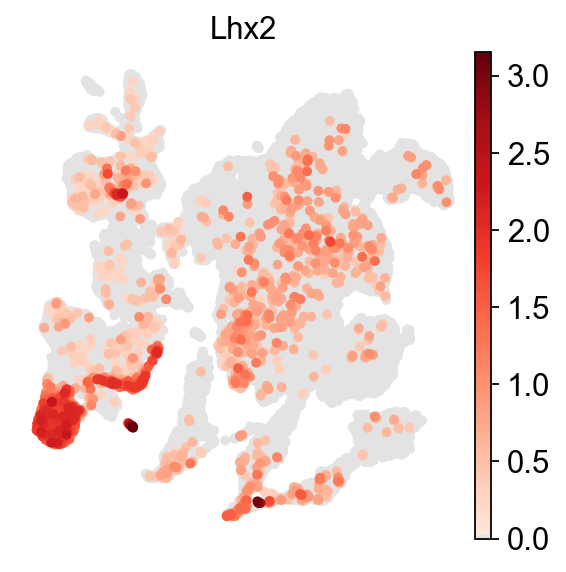

In [ ]:
sc.pl.umap(adata_all, color = ["Lhx2"], color_map = reds_cmap, frameon = False, size = 80, #alpha = .75,
         #  legend_loc='on data', save='Foxg1.svg'
          )

In [ ]:
# 1. Extract gene list
shared_genes = list(gene_list1)

# 2. Assign group labels to cells
adata_all.obs['cluster_group'] = ['olfactory' if x else 'forebrain' if y else 'rest'
                                  for x, y in zip(cl18_mask1, cl28_mask1)]

# 3. Subset AnnData to selected genes
adata_sub = adata_all[:, shared_genes]

# 4. Extract expression matrix as DataFrame
expr = pd.DataFrame(
    adata_sub.X.toarray() if hasattr(adata_sub.X, "toarray") else adata_sub.X,
    index=adata_sub.obs_names,
    columns=adata_sub.var_names
)
expr['cluster_group'] = adata_sub.obs['cluster_group'].values

# 5. Compute mean expression per gene per group
mean_expr = expr.groupby('cluster_group').mean().T

# 6. Apply Z-score normalization per gene (row)
zscore_expr = (mean_expr - mean_expr.mean(axis=1).values[:, None]) / mean_expr.std(axis=1).values[:, None]


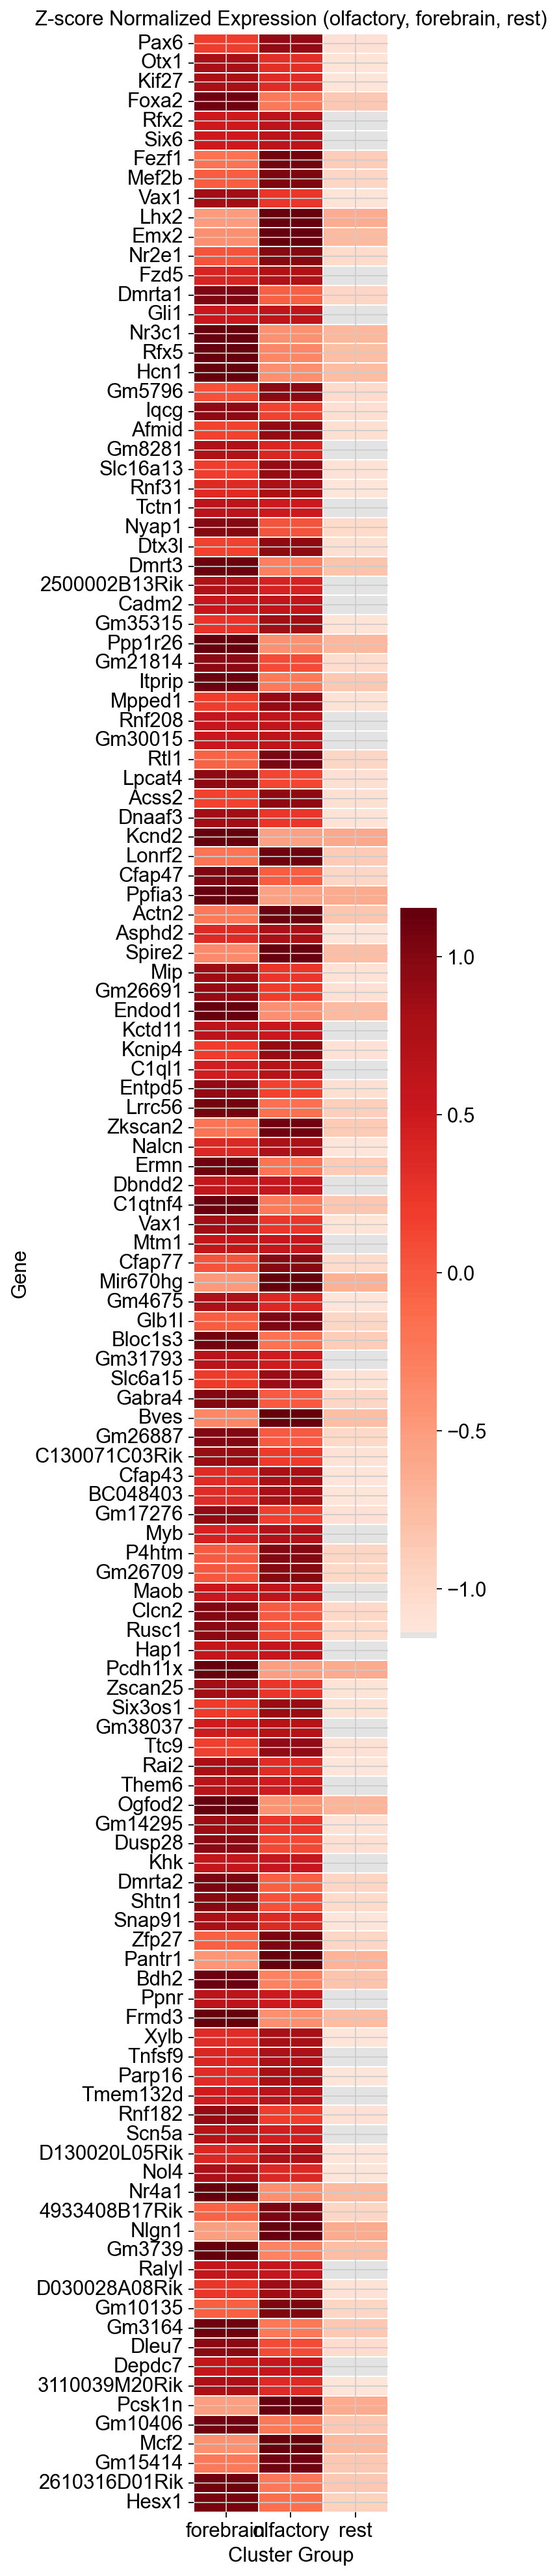

In [ ]:
fig, ax = plt.subplots(figsize=(5, 25))  # always better than plt.figure()

sns.heatmap(
    zscore_expr,
    cmap=reds_cmap,  # or your cmap variable
    linewidths=0.1,
    xticklabels=True,
    yticklabels=True,
    ax=ax
)

ax.set_title("Z-score Normalized Expression (olfactory, forebrain, rest)")
ax.set_xlabel("Cluster Group")
ax.set_ylabel("Gene")
plt.tight_layout()

# ✅ Save before plt.show()
fig.savefig("olfactory_forebrain_heatmap1_red.png", dpi=300, bbox_inches='tight')#plt.show()


In [ ]:
# Define your annotation labels
annotations_of_interest = [
    'Adenohypophyseal', 'Epibranchial', 'Epibranchial neurulation',
    'Lens', 'Olfactory', 'Otic', 'Otic vesicle',
    'Trigeminal', 'Trigeminal  neurulation', 'Otic neurulation'
]

# Track leiden clusters per annotation
annotation_leiden_map = {}

# Get all annotated cells
all_annotated_cells = set()

for annotation in annotations_of_interest:
    # Get cells with this annotation
    cell_names = adata_epcam.obs[adata_epcam.obs['cluster_annotations'] == annotation].index

    # Keep only cells that exist in adata_all
    valid_names = cell_names[cell_names.isin(adata_all.obs_names)]

    # Track annotated cells
    all_annotated_cells.update(valid_names)

    # Get leiden values
    leiden_values = adata_all.obs.loc[valid_names, 'leiden']
    cluster_counts = leiden_values.value_counts()

    # Save mapping
    annotation_leiden_map[annotation] = cluster_counts

# -------------------------------
# Detect "rest in embedding" cells
# -------------------------------
all_cells_in_embedding = set(adata_all.obs_names)
rest_in_embedding = list(all_cells_in_embedding - all_annotated_cells)

# Get their leiden clusters
rest_leiden_values = adata_all.obs.loc[rest_in_embedding, 'leiden']
rest_cluster_counts = rest_leiden_values.value_counts()

annotation_leiden_map["rest"] = rest_cluster_counts

# -------------------------------
# Detect "rest outside embedding"
# -------------------------------
all_epcam_cells = set(adata_epcam.obs_names)
rest_outside_embedding = list(all_epcam_cells - all_cells_in_embedding)

# (optional) you can store it separately
annotation_leiden_map["rest_outside"] = rest_outside_embedding

# -------------------------------
# Print all for verification
# -------------------------------
for k, v in annotation_leiden_map.items():
    print(f"\n{k}:")
    print(v)



Adenohypophyseal:
leiden
9     1630
1      857
12     221
28      26
2        4
3        4
27       4
29       1
0        0
30       0
24       0
25       0
26       0
31       0
22       0
32       0
33       0
34       0
35       0
36       0
37       0
23       0
19       0
21       0
20       0
18       0
17       0
16       0
15       0
14       0
13       0
11       0
10       0
8        0
7        0
6        0
5        0
4        0
38       0
Name: count, dtype: int64

Epibranchial:
leiden
4     2293
3     1261
12     613
25     437
1      191
2       75
31      12
22       8
0        7
6        5
7        4
13       3
9        2
29       2
35       0
34       0
36       0
33       0
32       0
30       0
28       0
27       0
37       0
26       0
19       0
24       0
23       0
21       0
20       0
18       0
17       0
16       0
15       0
14       0
11       0
10       0
8        0
5        0
38       0
Name: count, dtype: int64

Epibranchial neurulation:
leiden
14    14

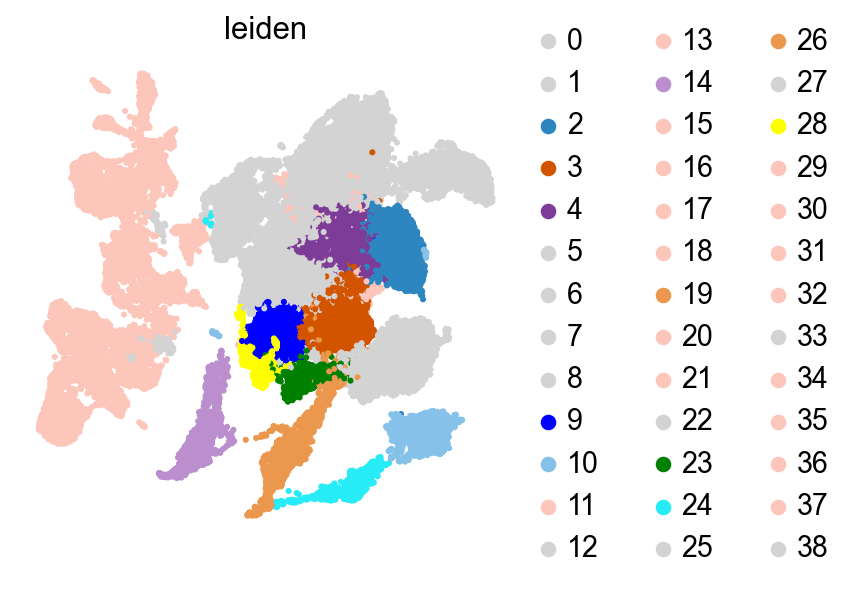

In [ ]:
import matplotlib.pyplot as plt

# 1. Define highlight colors
highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Epibranchial neurulation': '#bb8fce',
    'Lens': 'green',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Otic vesicle': '#85c1e9',
    'Trigeminal': '#d35400',
    'Trigeminal  neurulation': '#eb984e',
    'Otic neurulation': '#27EBF5',
    'rest': 'lightgray',         # explicitly set clusters
    'rest_outside': '#FCC6BB'    # remaining clusters not covered
}

# 2. Annotations of interest
annotations_of_interest = list(highlight_colors.keys())

# 3. Build map: annotation -> leiden clusters (most dominant per annotation)
annotation_leiden_map = {}

for annotation in annotations_of_interest:
    cell_names = adata_epcam[adata_epcam.obs['cluster_annotations'] == annotation].obs_names
    valid_names = cell_names[cell_names.isin(adata_all.obs_names)]

    if len(valid_names) == 0:
        continue

    leiden_values = adata_all.obs.loc[valid_names, 'leiden']
    cluster_counts = leiden_values.value_counts()

    annotation_leiden_map[annotation] = cluster_counts

# 4. Map leiden cluster to color based on dominant annotation
leiden_to_color = {}

for annot, series in annotation_leiden_map.items():
    color = highlight_colors.get(annot, 'darkgrey')
    max_cluster = series.idxmax()
    leiden_to_color[str(max_cluster)] = color

# 5. Manually assign clusters to 'rest' (light gray)
manual_rest_clusters = ['7', '8', '38', '33', '6', '1', '25', '5', '22', '12', '27']  # REMOVED '26'

# Map rest clusters
for cluster in manual_rest_clusters:
    leiden_to_color[str(cluster)] = highlight_colors['rest']

# 6. Explicitly map cluster 26 to 'Trigeminal  neurulation'
leiden_to_color['26'] = highlight_colors['Trigeminal  neurulation']

# 7. Build the final palette for all clusters
all_clusters = adata_all.obs['leiden'].cat.categories
cluster_palette = [
    leiden_to_color.get(c, highlight_colors['rest_outside']) for c in all_clusters
]

# 8. Plot UMAP
sc.pl.umap(
    adata_all,
    color='leiden',
    palette=cluster_palette,
    frameon=False,
    size=30,
   #save='umap_for_cassiopea1.svg'
)


In [ ]:
adata_all.write_h5ad('placodes_rest_on_all.h5ad')